<a href="https://colab.research.google.com/github/mozhganmirbagheri/DeepLearning/blob/main/Mnist_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
# Extract features and labels
X = mnist.data  # Features (28x28 pixel values flattened to 784)
y = mnist.target.astype(int)  # Labels (digits 0-9)

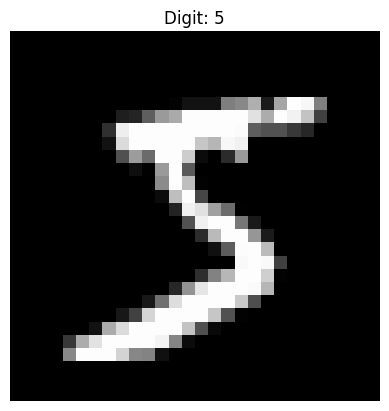

In [ ]:
# Reshape the image data to 28x28 pixels
image = X.iloc[0].values.reshape(28, 28) # Access the first row using iloc and convert to a NumPy array using .values
# Choose image index (0 for the first image)

# Display the image
plt.imshow(image, cmap='gray') # cmap='gray' for grayscale image
plt.title(f"Digit: {y[0]}")
plt.axis('off') # Hide axes
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
print(X.iloc[0])

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64


In [ ]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64


In [ ]:
import numpy as np
#Select a subset of the data
subset_size = 20000  # Number of samples to use
indices = np.random.choice(len(X), subset_size, replace=False)
X_subset, y_subset = X.iloc[indices], y.iloc[indices]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [ ]:

# Standardize the features to improve SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  35.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  35.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  35.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  35.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  35.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  33.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  31.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  30.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  27.2s
[CV] END ......................C=0.1, gamma=0.01

In [ ]:

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.001, random_state=42)  # RBF kernel with tuned parameters
svm_classifier.fit(X_train, y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [ ]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.956

Confusion Matrix:
 [[392   0   1   0   2   2   2   0   1   0]
 [  0 454   1   2   0   0   0   1   0   1]
 [  1   2 381   3   0   1   2   5   2   0]
 [  0   0   3 398   0   7   0   3   4   4]
 [  0   0   2   0 349   0   3   3   0   6]
 [  0   0   3   6   2 313  10   4   1   2]
 [  0   0   4   0   0   3 386   7   4   0]
 [  2   3   2   1   2   0   0 428   0   3]
 [  2   3   4   3   2   2   3   2 361   3]
 [  0   4   1   3   8   2   1   8   2 362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       400
           1       0.97      0.99      0.98       459
           2       0.95      0.96      0.95       397
           3       0.96      0.95      0.95       419
           4       0.96      0.96      0.96       363
           5       0.95      0.92      0.93       341
           6       0.95      0.96      0.95       404
           7       0.93      0.97      0.95       441
           8       0.

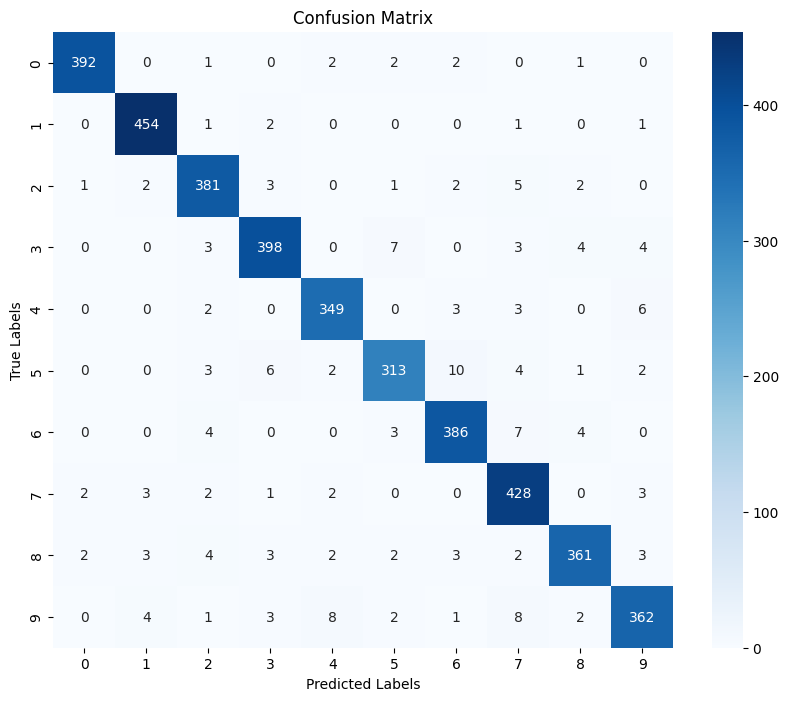

In [ ]:

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Visualize some test results
def plot_images_with_predictions(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

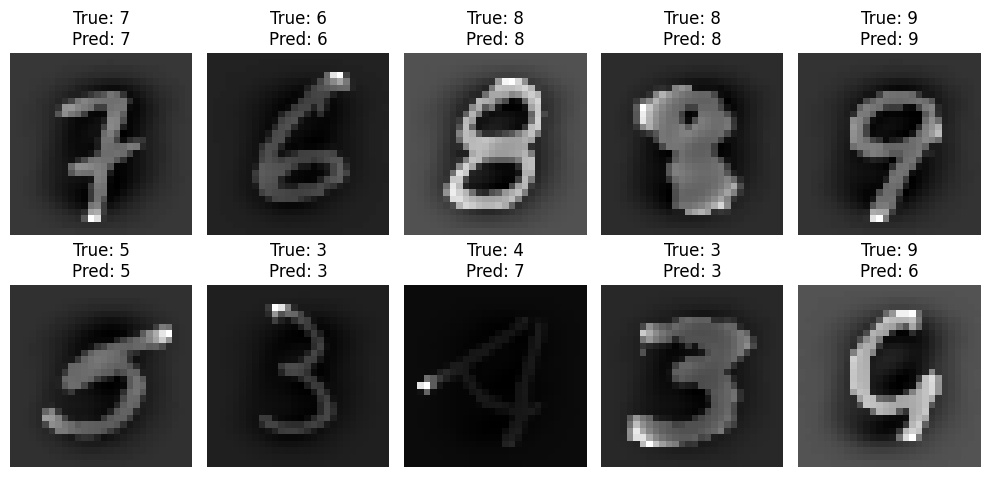

In [ ]:
# Ensure all data are numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Select random samples from the test set
sample_indices = np.random.choice(len(y_test), 10, replace=False)

# Visualize the selected samples
plot_images_with_predictions(
    X_test[sample_indices],  # Images from the test set
    y_test[sample_indices],  # True labels
    y_pred[sample_indices],  # Predicted labels
    num_images=10            # Number of images to visualize
)
